# Train Data

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
!pip install category_encoders

In [ ]:
train_df=pd.read_csv("/content/Train.csv")

train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Feature Engineering-1

In [ ]:
train_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
for i in train_df.columns[train_df.dtypes=="object"]:
  train_df[i]=train_df[i].astype("category")


In [ ]:
train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0],inplace=True)




---


Filling null values with mode values as column type is categorical


---



In [ ]:
grp=train_df.groupby("Item_Identifier")
grp.get_group("DRA12")

<ipython-input-7-82280bb45faf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp=train_df.groupby("Item_Identifier")


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Medium,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Medium,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308


In [ ]:
grp.get_group("FDC44")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1094,FDC44,15.6,Low Fat,0.000000,Fruits and Vegetables,111.9518,OUT049,1999,Medium,Tier 1,Supermarket Type1,2163.1842
3708,FDC44,15.6,Low Fat,0.172453,Fruits and Vegetables,115.1518,OUT013,1987,High,Tier 3,Supermarket Type1,683.1108
4504,FDC44,NaN,Low Fat,0.171761,Fruits and Vegetables,115.7518,OUT027,1985,Medium,Tier 3,Supermarket Type3,5351.0346
5626,FDC44,15.6,Low Fat,0.172947,Fruits and Vegetables,114.1518,OUT045,2002,Medium,Tier 2,Supermarket Type1,1821.6288
6967,FDC44,15.6,Low Fat,0.173573,Fruits and Vegetables,114.4518,OUT017,2007,Medium,Tier 2,Supermarket Type1,2390.8878
7577,FDC44,15.6,Low Fat,0.172597,Fruits and Vegetables,114.8518,OUT046,1997,Small,Tier 1,Supermarket Type1,2163.1842




---


We can see that products with same Item_Identifier has same weight


---



In [ ]:
def fill_missing_weight(df, grp):
  def g(group):

    return group.fillna(group.bfill())


  return df.groupby('Item_Identifier')['Item_Weight'].transform(g)

train_df["Item_Weight"] = fill_missing_weight(train_df.copy(), grp)

<ipython-input-9-77352be83d0f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('Item_Identifier')['Item_Weight'].transform(g)


In [ ]:
train_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,304
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0




---


The remaining null values are single items , we can just drop those values

---



In [ ]:
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
for i in train_df.columns[train_df.dtypes=="category"]:
  print(train_df[i].unique())

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', ..., 'FDD28', 'FDU43', 'NCF55', 'NCW30', 'NCW05']
Length: 1555
Categories (1559, object): ['DRA12', 'DRA24', 'DRA59', 'DRB01', ..., 'NCZ41', 'NCZ42', 'NCZ53',
                            'NCZ54']
['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
Categories (5, object): ['LF', 'Low Fat', 'Regular', 'low fat', 'reg']
['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', ..., 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
Length: 16
Categories (16, object): ['Baking Goods', 'Breads', 'Breakfast', 'Canned', ..., 'Seafood', 'Snack Foods',
                          'Soft Drinks', 'Starchy Foods']
['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
Categories (10, object): ['OUT010', 'OUT013', 'OUT017', 'OUT018', ..., 'OUT035', 'OUT045', 'OUT046',
                          'OUT049']
['Medium', 'High', 'Small']
Categories (3, object): ['High', 'Medium', 'Small']
['Tier 1', 'T



---


We can see that LF and low fat are same as Low Fat and reg is same as Regular


---



In [ ]:
replacements = {
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
}

train_df["Item_Fat_Content"].replace(replacements, inplace=True)

In [ ]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8214,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8215,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8216,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8217,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## EDA Analysis

<ipython-input-16-efdb6ddb5835>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Item_Fat_Content_size=train_df.groupby("Item_Fat_Content").size()


<Axes: xlabel='Item_Fat_Content'>

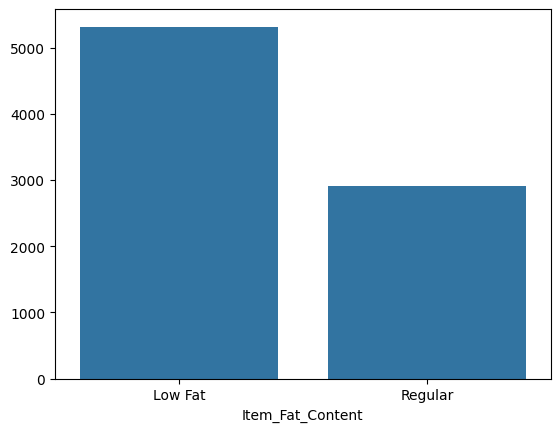

In [ ]:
Item_Fat_Content_size=train_df.groupby("Item_Fat_Content").size()
sns.barplot(data=Item_Fat_Content_size)

<ipython-input-17-7d2d1f1750d9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Outlet_Location_Type_size=train_df.groupby("Outlet_Location_Type").size()


<Axes: xlabel='Outlet_Location_Type'>

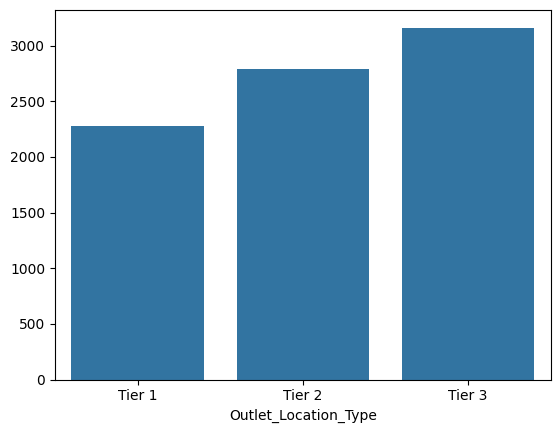

In [ ]:

Outlet_Location_Type_size=train_df.groupby("Outlet_Location_Type").size()
sns.barplot(data=Outlet_Location_Type_size)

<ipython-input-18-c5ec0b4d67d2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Outlet_Type_size=train_df.groupby("Outlet_Type").size()


<Axes: xlabel='Outlet_Type'>

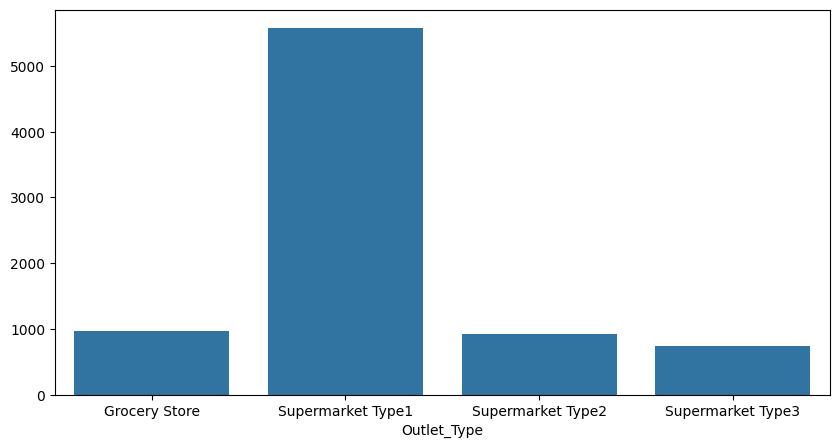

In [ ]:
plt.figure(figsize=(10,5))
Outlet_Type_size=train_df.groupby("Outlet_Type").size()
sns.barplot(data=Outlet_Type_size)

<ipython-input-19-87cb09d720bf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Outlet_Size_size=train_df.groupby("Outlet_Size").size()


<Axes: xlabel='Outlet_Size'>

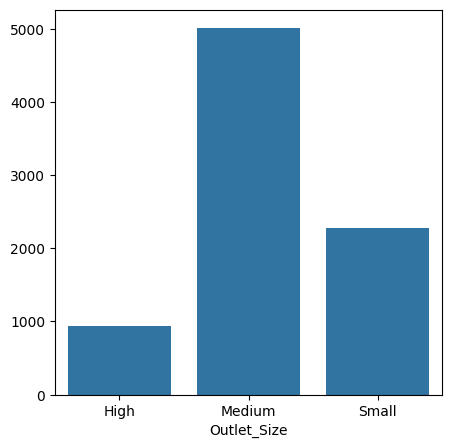

In [ ]:
plt.figure(figsize=(5,5))
Outlet_Size_size=train_df.groupby("Outlet_Size").size()
sns.barplot(data=Outlet_Size_size)

<ipython-input-20-6079d2f8f9e0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Item_Type_size=train_df.groupby("Item_Type").size().sort_values()


<BarContainer object of 16 artists>

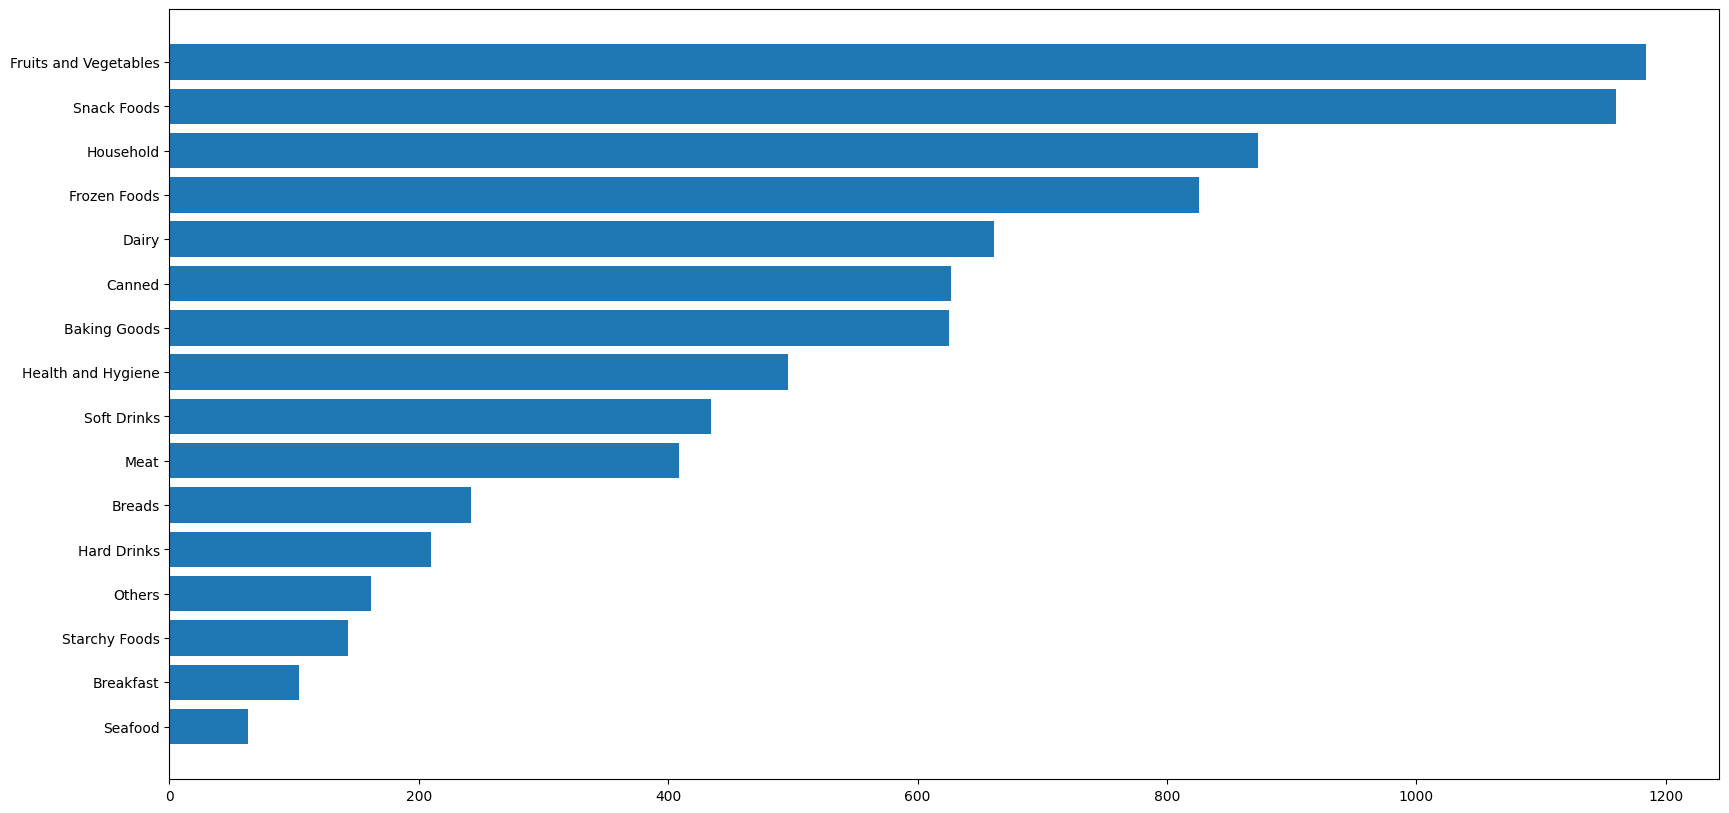

In [ ]:
plt.figure(figsize=(20,10))

Item_Type_size=train_df.groupby("Item_Type").size().sort_values()
Item_Type_size
plt.barh(Item_Type_size.index,Item_Type_size.values)



---



---


**Here are the observations from the graphs:**
* People buy more low-fat items compared to Regular Fat items.
* The bar chart shows that the number of outlets increases as the tier level increases, with Tier 3 having the most outlets and Tier 1 having the least.
* There are very high sales from Supermarket Type 1.
* There are very high sales in medium-sized outlets.
* Fruits ,Vegetables, and Snacks are the most sold items.


---



---



<Axes: >

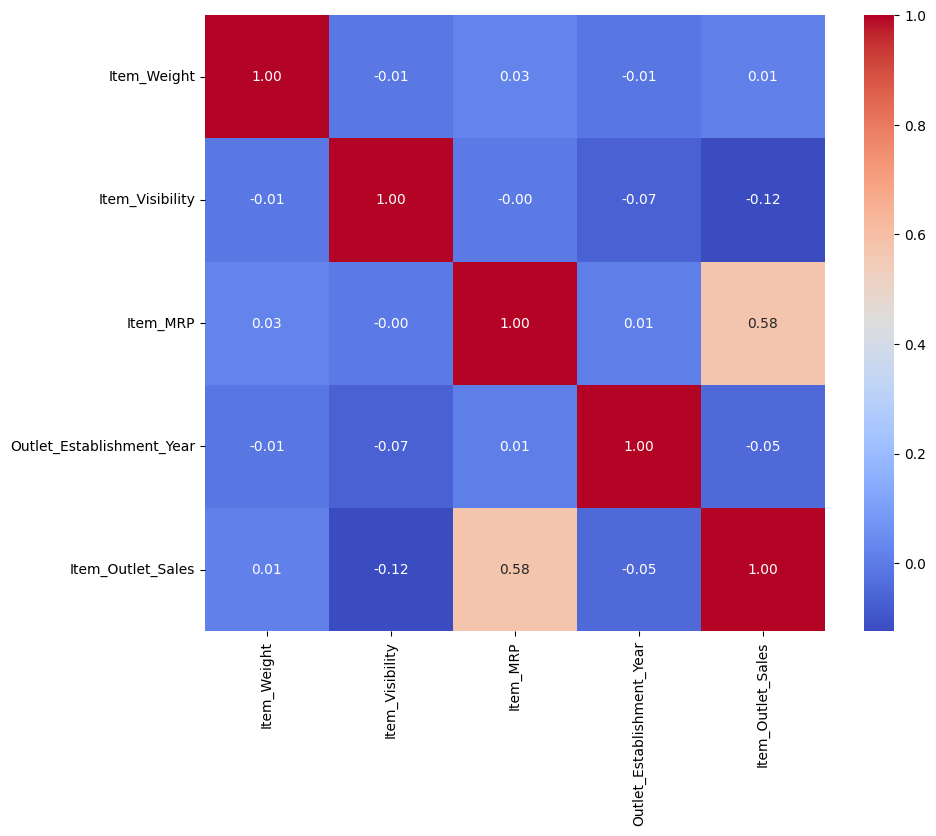

In [ ]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")



---



---


Item_MRP and Item_Outlet_Sales are highly correlated

---



---



In [ ]:
train_df["Item_Visibility"][train_df["Item_Visibility"]==0].count()

511



---



---
There are 511 items with no Visibility.


---



---



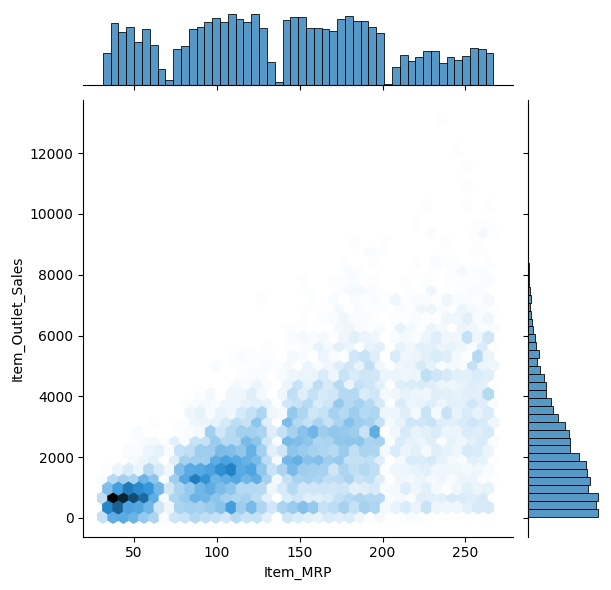

In [ ]:
g=sns.jointplot(x="Item_MRP",y="Item_Outlet_Sales",data=train_df,kind="hex",marginal_kws=dict(bins=50, fill=True))

plt.show()

## Feature Engineering -2




---


Item_Identifier,Outlet_Identifier, Item_Type and Outlet_Type doesnt have any ordinal relationship, whereas Item_Fat_Content,Outlet_Size and Outlet_Location_Type are ordinal columns.

---



In [ ]:
train_df.groupby("Item_Identifier").size()

<ipython-input-24-5e878433f98a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby("Item_Identifier").size()


,0
Item_Identifier,
DRA12,6
DRA24,7
DRA59,8
DRB01,2
DRB13,5
...,...
NCZ30,7
NCZ41,5
NCZ42,5




---


As this feature has a high number of unique values with almost the same frequency, we can't apply one-hot encoding or frequency encoding. It's better to apply binary encoding.


---



In [ ]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['Item_Identifier'])

# Fit the encoder with the entire DataFrame and target column
train_df_encoded = target_encoder.fit_transform(train_df[['Item_Identifier']], train_df['Item_Outlet_Sales'])

In [ ]:
train_df["Item_Identifier"]=train_df_encoded


In [ ]:
sorted_years = train_df['Outlet_Establishment_Year'].sort_values().unique()
year_mapping = {year: idx for idx, year in enumerate(sorted_years)}

# Map the original values to the new range
train_df['Outlet_Establishment_Year'] = train_df['Outlet_Establishment_Year'].map(year_mapping)

In [ ]:
train_df.groupby("Outlet_Identifier").size()

<ipython-input-28-6ec2fbe42029>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby("Outlet_Identifier").size()


,0
Outlet_Identifier,
OUT010,555
OUT013,932
OUT017,926
OUT018,928
OUT019,413
OUT027,746
OUT035,930
OUT045,929
OUT046,930


In [ ]:
train_df.groupby("Item_Type").size()

<ipython-input-29-8de3f635205e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby("Item_Type").size()


,0
Item_Type,
Baking Goods,625
Breads,242
Breakfast,104
Canned,627
Dairy,661
Frozen Foods,826
Fruits and Vegetables,1184
Hard Drinks,210
Health and Hygiene,496


In [ ]:
train_df.groupby("Outlet_Type").size()

<ipython-input-30-ca4501263c65>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby("Outlet_Type").size()


,0
Outlet_Type,
Grocery Store,968
Supermarket Type1,5577
Supermarket Type2,928
Supermarket Type3,746


---
As the other three columns have less number of columns we can apply one hot encoding and drop 1 column from each.

---



In [ ]:
z = train_df.loc[:, ["Outlet_Identifier", "Item_Type", "Outlet_Type"]]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Outlet_Identifier', 'Item_Type', 'Outlet_Type'])  # Apply OneHotEncoder and drop the first category
    ],
    remainder='passthrough' )
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline.fit(z)
X_train_encoded = pipeline.transform(z)
encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)


In [ ]:
X_train_encoded_df

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Type_Breads,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8215,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8217,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

ordinal_categories = {
    'Outlet_Size': ['Small', 'Medium', 'High'],
    'Outlet_Location_Type': ['Tier 3', 'Tier 2', 'Tier 1']
}

# Initialize OrdinalEncoder with the predefined categories
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_categories.keys()])

# Fit and transform the data for the specified columns
X_encoded = ordinal_encoder.fit_transform(train_df[ordinal_categories.keys()])

# Convert the result to a DataFrame
transformed_df = pd.DataFrame(X_encoded+1, columns=ordinal_categories.keys())




In [ ]:
onehot_encoder1 = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'Item_Fat_Content' column
item_fat_encoded = onehot_encoder1.fit_transform(train_df[['Item_Fat_Content']])

# Convert the result to a DataFrame with appropriate column names
item_fat_encoded_df = pd.DataFrame(item_fat_encoded, columns=onehot_encoder1.get_feature_names_out(['Item_Fat_Content']))

In [ ]:
train_df.drop(["Outlet_Identifier", "Item_Type", "Outlet_Type",'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'],axis=1,inplace=True)

In [ ]:
train_df[X_train_encoded_df.columns]=X_train_encoded_df
train_df[transformed_df.columns]=transformed_df
train_df[item_fat_encoded_df.columns]=item_fat_encoded_df

In [ ]:
train_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular
0,2874.006713,9.300,0.016047,249.8092,4,3735.1380,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0
1,1914.517583,5.920,0.019278,48.2692,8,443.4228,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
2,2042.683964,17.500,0.016760,141.6180,4,2097.2700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0
3,2271.755475,19.200,0.000000,182.0950,3,732.3800,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
4,1873.315566,8.930,0.000000,53.8614,1,994.7052,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,2419.036428,6.865,0.056783,214.5218,1,2778.3834,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
8215,2265.513985,8.380,0.046982,108.1570,5,549.2850,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
8216,1985.594903,10.600,0.035186,85.1224,6,1193.1136,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0
8217,2152.993187,7.210,0.145221,103.1332,8,1845.5976,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0


In [ ]:
cols_to_convert = train_df.columns[train_df.columns.get_loc("Outlet_Identifier_OUT013"):]
train_df[cols_to_convert] = train_df[cols_to_convert].round().astype("int64")

In [ ]:
train_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular
0,2874.006713,9.300,0.016047,249.8092,4,3735.1380,0,0,0,0,...,0,0,0,0,1,0,0,2,3,0
1,1914.517583,5.920,0.019278,48.2692,8,443.4228,0,0,1,0,...,0,0,1,0,0,1,0,2,1,1
2,2042.683964,17.500,0.016760,141.6180,4,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,2,3,0
3,2271.755475,19.200,0.000000,182.0950,3,732.3800,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
4,1873.315566,8.930,0.000000,53.8614,1,994.7052,1,0,0,0,...,0,0,0,0,1,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,2419.036428,6.865,0.056783,214.5218,1,2778.3834,1,0,0,0,...,0,1,0,0,1,0,0,3,1,0
8215,2265.513985,8.380,0.046982,108.1570,5,549.2850,0,0,0,0,...,0,0,0,0,1,0,0,2,2,1
8216,1985.594903,10.600,0.035186,85.1224,6,1193.1136,0,0,0,0,...,0,0,0,0,1,0,0,1,2,0
8217,2152.993187,7.210,0.145221,103.1332,8,1845.5976,0,0,1,0,...,0,1,0,0,0,1,0,2,1,1


In [ ]:
Y_train=train_df.loc[:,"Item_Outlet_Sales"]
train_df=train_df.drop("Item_Outlet_Sales",axis=1)

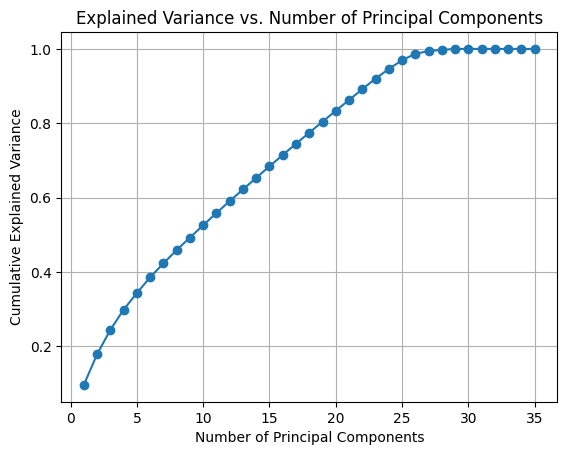

In [ ]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

for i in train_df.columns:
    if train_df[i].dtype in ['float64', 'int64']:
        train_df[i] = scaler1.fit_transform(train_df[i].values.reshape(-1, 1))
Y_train = scaler2.fit_transform(Y_train.values.reshape(-1, 1))
pca = PCA(n_components=35)
X_pca = pca.fit_transform(train_df)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

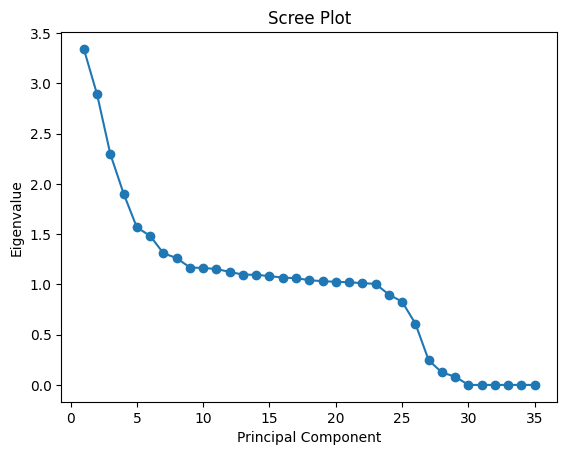

In [ ]:
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()



---



---

Ideal value of n_components is 36

---



---



In [ ]:
pca=PCA(n_components=27)
x=pca.fit_transform(train_df)
df=pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-1.582014,-0.001682,0.718544,3.469696,0.575558,0.850910,2.411366,0.616096,-0.277664,0.262966,...,-0.249599,-0.330832,-0.604481,-0.501697,0.099666,-0.085713,-1.071790,-0.809827,0.719788,0.045144
1,3.144181,-3.286125,-1.001361,-2.136185,0.155535,-0.386401,0.397942,-0.824774,-0.813021,-0.827328,...,2.460089,-1.125467,-0.360141,0.251166,0.125705,-0.177967,-0.091585,-0.685106,-1.578711,-0.143221
2,-1.550585,0.026713,0.415538,-0.473327,0.279094,-0.170048,2.675300,-0.097599,-0.229344,0.263005,...,0.954718,0.863844,-0.688018,-0.385681,0.014393,-0.266771,0.845281,0.226631,1.505355,0.110896
3,1.060875,0.279491,0.164904,1.044992,0.364989,-1.113587,0.025393,-0.666375,2.223089,-0.356516,...,0.113395,-0.017975,-0.185090,-0.259620,-0.102862,-0.073082,0.879361,-1.218317,-0.573224,2.017648
4,0.852750,1.077027,3.196261,-2.174770,0.332681,2.104384,-0.916691,-0.937769,-0.004621,0.228092,...,-0.876636,-0.331855,-0.292396,0.046453,-0.045244,0.252315,-1.139793,-1.029506,-0.518840,-0.146972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,0.883509,1.123990,3.192461,1.379706,1.314171,0.535291,-1.006472,-0.250105,-2.242825,-0.333777,...,-0.323471,0.171560,-0.223879,-0.249804,0.003918,0.117065,-1.085365,-0.217156,0.872922,-0.179729
8215,-0.686766,-0.333766,0.940009,-0.047572,-0.350835,-1.099426,0.080585,0.258747,-0.106935,-1.908220,...,0.240301,-0.124687,-0.310050,0.294095,0.040000,-0.287500,-0.665875,-0.389336,-1.001943,-0.146089
8216,-1.354346,-0.834867,-0.725376,-1.383883,-2.383500,1.056069,-1.566485,-0.569584,-0.203297,-0.213817,...,-0.339820,-1.028891,-0.663142,0.351022,0.195379,-0.286124,-0.649792,0.037913,-0.681390,-0.081221
8217,3.177611,-3.194190,-1.221495,-0.304009,1.293057,-1.213468,0.055809,0.208676,-1.947183,-0.517158,...,-0.513001,0.059183,-0.147562,0.177793,-0.056177,0.097291,-1.103757,1.147687,-0.693232,-0.432843


## ANN Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,Y_train,test_size=0.2,random_state= 1)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - loss: 2.3141 - mean_squared_error: 2.0755 - val_loss: 1.2447 - val_mean_squared_error: 1.0283
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.1199 - mean_squared_error: 0.9097 - val_loss: 1.1366 - val_mean_squared_error: 0.9447
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.9978 - mean_squared_error: 0.8108 - val_loss: 0.8851 - val_mean_squared_error: 0.7121
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.8760 - mean_squared_error: 0.7070 - val_loss: 0.7488 - val_mean_squared_error: 0.5930
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.7852 - mean_squared_error: 0.6338 - val_loss: 0.6973 - val_mean_squared_error: 0.5578
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.7288 - mean_squared_error: 0.5925 - val_loss: 0.6472 - val_mean_squared_error: 0.5209
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.6800 - mean_squared_error: 0.5571 - val_loss: 0.6136 - val_mea

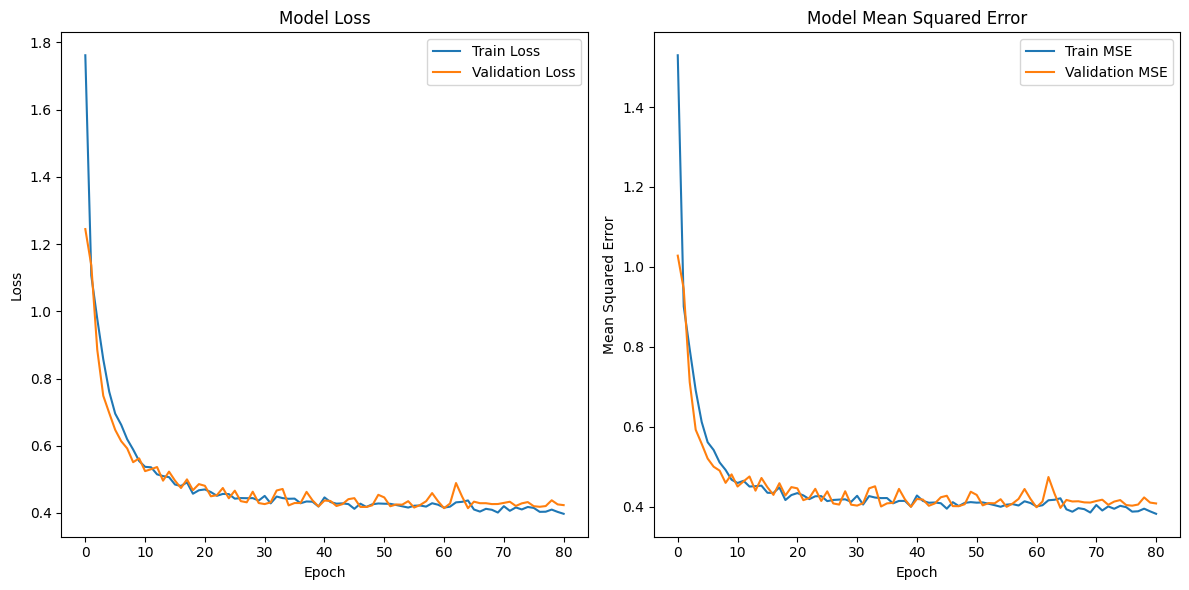

In [ ]:

from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.4))
model.add(Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.005)))

model.add(Dropout(0.5))



model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_squared_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=200, batch_size=512, verbose=1, validation_split=0.3, callbacks=[early_stopping])

y_pred = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()